# Polynomial Classification

In this exercise you need to use polynomial regression to estimate the height reached by a ball thrown into air. The motion of the ball is controlled by the motion equation with uniform acceleration (in our case given by the gravity) that is a quadratic model. You need to estimate the initial height of the ball (h), the initial speed at which it was launched (v) and the gravity acceleration (g). The equation of the motion is : $y = h + vt + \frac{1}{2} gt^2$ .
In the height.csv file you can find the measured height values (subject to noise) while in time.csv file you can find the corresponding time instants.

In [2]:
#import the required packages
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [4]:
# load the data from the time.csv (features) and height.csv (measured values) files
with open('data/time.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get all the rows as a list
    x = list(reader)
    # transform x into numpy array
    x = np.array(x).astype(float)
    
with open('data/height.csv', 'r') as f2:
    reader2 = csv.reader(f2, delimiter=',')
    # get all the rows as a list
    y = list(reader2)
    # transform data into numpy array
    y = np.array(y).astype(float)
    
print(x.shape)
print(y.shape)

(201, 1)
(201, 1)


In [5]:
# try to perform a linear regression (it does not work properly, the model is quadratic !)

slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0], y[:,0])

print('slope (linregress): ', slope,'  intercept (lnregress):', intercept);
print('correlation coefficient:', r_value)

slope (linregress):  0.22423930932968628   intercept (lnregress): 4.215375108703984
correlation coefficient: 0.08764757852933568


In [7]:
# use polynomial regression (the feature vectors have three components:
# they contain all 1s (for bias), the input data $x$ and their squared values $x^2$

dataX = np.zeros([201,3])  
dataX[:,0] = np.ones([201])  # dataX[:,0]: bias 
dataX[:,1] = x[:,0]   # dataX[:,1]: 1st order terms
dataX[:,2] =x[:,0]*x[:,0]   # dataX[:,2]: 2nd order terms

reg = sl.linear_model.LinearRegression().fit(dataX, y)  #perform linear regression

h = reg.intercept_
v = reg.coef_[:,1]
g = -reg.coef_[:,2]*2  # 0.5gt^2 -> g = -2*coeff
sc = reg.score(dataX,y)


print('initial position: ', h,'  initial speed:', v, ' gravity acceleration:', g )
# reg.score contains the square of the correlation coefficient
print('correlation coefficient:', np.sqrt(sc))

initial position:  [0.96499498]   initial speed: [10.0243804]  gravity acceleration: [9.80014109]
correlation coefficient: 0.9977953125219581


# Question

Explain what do you conclude looking at the linear and polynomial fitting.

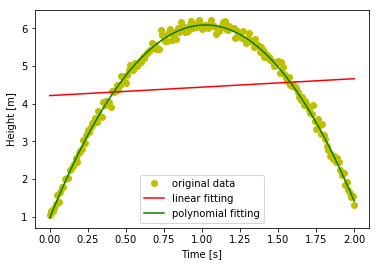

In [8]:
# plot the input data and the estimated models
plt.plot(x, y, 'oy', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='linear fitting')
plt.plot(x, reg.intercept_ + reg.coef_[:,1]*x + reg.coef_[:,2]*x*x, 'g', label='polynomial fitting')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.show()